In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import default_rng
from matplotlib.figure import figaspect

from thztoolsPY.thzgen import thzgen
from thztoolsPY.noiseamp import sigmamu

In [2]:
n = 256     # Number of samples
amp = 1     # Amplitude [units of the peak signal]
ts = 0.05   # Sampling time [ps]
t0 = 2.5    # Peak pulse time [ps]
w = 0.25    # Pulse width [ps]

sigma_alpha = 1e-4  # Additive noise amplitude [signal units]
sigma_beta = 1e-2   # Multiplicative noise amplitude [dimensionless]
sigma_tau = 1e-3    # Time base noise amplitude [ps]
sigma = np.array([sigma_alpha, sigma_beta, sigma_tau])

n_mc = 500  # Number of Monte Carlo repetitions
seed = 0    # RNG seed
rng = default_rng(seed)

In [3]:
y, t = thzgen(n, ts, t0)
noise_amp = sigmamu(sigma, y, ts)

# Use broadcasting to generate multiple simulated noisy measurements of y
ym = (y + noise_amp * rng.standard_normal((n_mc, n))).T

# Use NumPy real FFT algorithms to compute frequencies and spectra
f = np.fft.rfftfreq(n, ts)
ym_ft = np.fft.rfft(ym, axis=0)

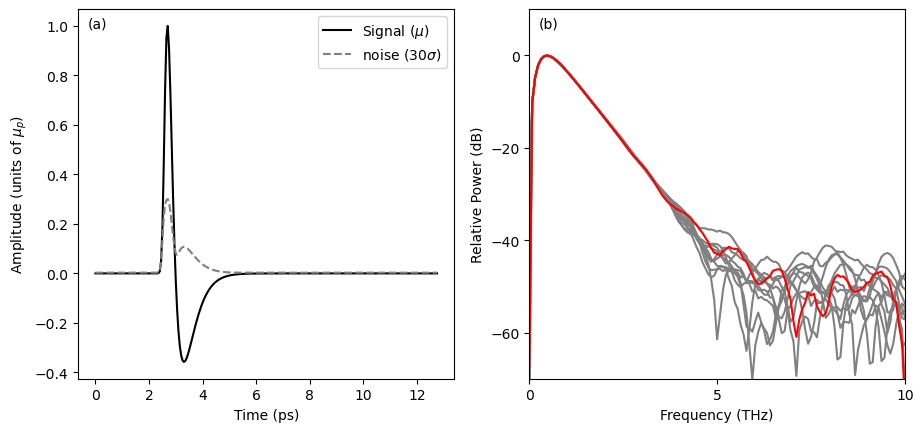

In [4]:
w, h = figaspect(0.45)
_, axs = plt.subplots(1, 2, figsize=(w, h))

axs[0].plot(t, y, c='k', label=r'Signal ($\mu$)')
axs[0].plot(t, noise_amp * 30, ls='--', c='grey', label=r'noise $(30 \sigma$)')

axs[0].legend()
axs[0].text(0.025, 0.95, '(a)', transform=axs[0].transAxes)

axs[0].set_xlabel('Time (ps)')
axs[0].set_ylabel(r'Amplitude (units of $\mu_{p})$')

axs[1].plot(f, 20 * np.log10(abs(ym_ft[:, 1:11]) / max(abs(ym_ft[:, :11].flatten()))), c='grey')
axs[1].plot(f, 20 * np.log10(abs(ym_ft[:, 0]) / max(abs(ym_ft[:, :11].flatten()))), c='red')

axs[1].text(0.025, 0.95, '(b)', transform=axs[1].transAxes)

axs[1].set_xlabel('Frequency (THz)')
axs[1].set_ylabel('Relative Power (dB)')

axs[1].set_xticks(np.arange(0, 11, 5))
axs[1].set_xlim(0, 10)
axs[1].set_yticks(np.arange(-60, 10, 20))
axs[1].set_ylim(-70, 10)

plt.show()